In [6]:
import logging
logging.basicConfig(level=logging.DEBUG)
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from ot_dis.wtk.utilities import get_ucr_dataset, krein_svm_grid_search
from ot_dis.wtk import transform_to_dist_matrix, get_kernel_matrix, wtk_distance
import numpy as np
import os
from getData import getData
from knn import knn_OTW
import time

In [7]:
import torch
import numpy as np
from getData import getData
import seaborn as sns
import os
from ot_dis.kpg import kpg_sequence_distance, kpg_sequence_partial_distance
from knn import knn_sequence_KPG
from ot_dis.wtk import wtk_distance

# 1. Load data

In [8]:
X_train, y_train, X_test, y_test = getData('BME', '../data/UCR/raw_data/')

In [9]:
len(X_train), len(X_test), X_train[0].shape

(30, 150, (128,))

# 2. Metrics proposal

## 2.1. WTK

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000291FFBF3150>


(1.0110712051391602, 0.3253678601524448)

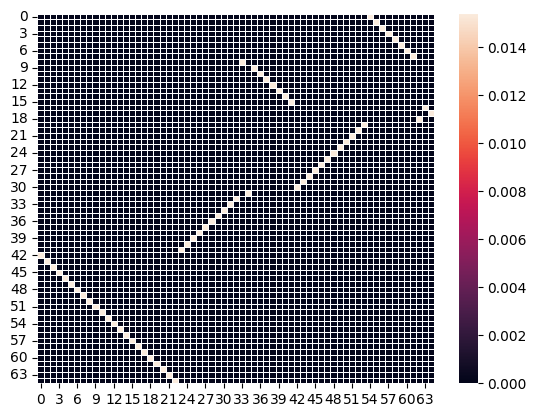

In [16]:
xs = X_train[8]
xt = X_test[9]
start_time = time.time()
pi_wtk, cost_wtk = wtk_distance(xs, xt, 64, plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

## 2.2 KPG_Sequence

c:\Users\hoang\OneDrive\Documents\lab\code\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000291FFB34390>


(0.6533253192901611, 0.9401204986308932)

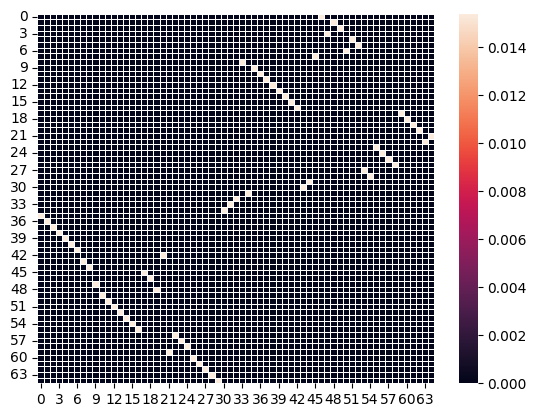

In [19]:
xs = X_train[8]
xt = X_test[9]
sub_length = 64
lamb = 50
start_time = time.time()
pi_kpg_sequence, cost_kpg_sequence = kpg_sequence_distance(a=xs, b=xt, plot=True, lamb=lamb, sub_length=sub_length)
end_time = time.time()
end_time - start_time, cost_kpg_sequence

# Test

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\hoang\\OneDrive\\Documents\\lab\\code\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\hoang\\OneDrive\\Documents\\lab\\code\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\hoang\\OneDrive\\Documents\\lab\\code\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono.ttf', name='DejaVu Sans M

It.  |Err         
-------------------
    0|2.861463e-01|
   10|1.860154e-01|
   20|8.144529e-02|
   30|3.130143e-02|
   40|1.178815e-02|
   50|4.426078e-03|
   60|1.661047e-03|
   70|6.233110e-04|
   80|2.338932e-04|
   90|8.776627e-05|
  100|3.293340e-05|
  110|1.235791e-05|
  120|4.637176e-06|
  130|1.740051e-06|
  140|6.529356e-07|
  150|2.450071e-07|
  160|9.193632e-08|
  170|3.449812e-08|
  180|1.294505e-08|
  190|4.857493e-09|
It.  |Err         
-------------------
  200|1.822723e-09|


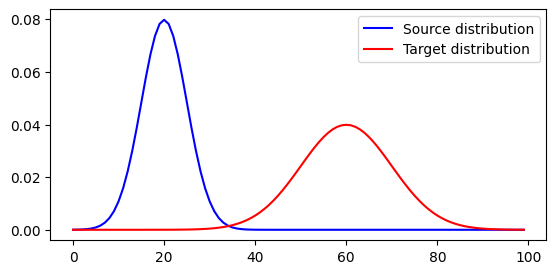

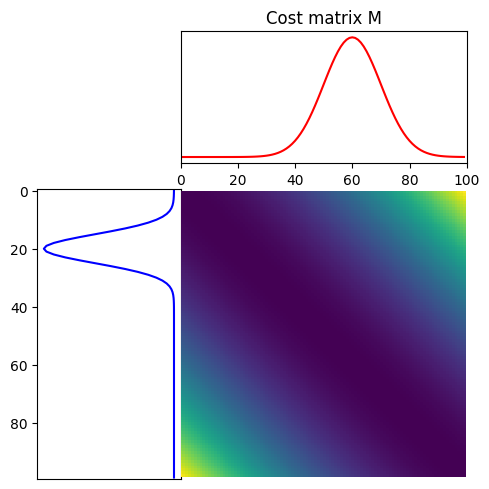

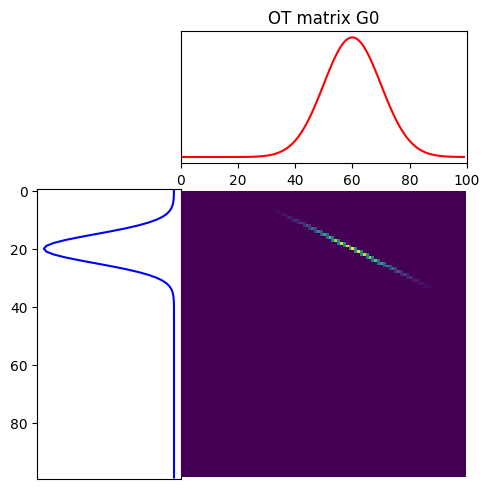

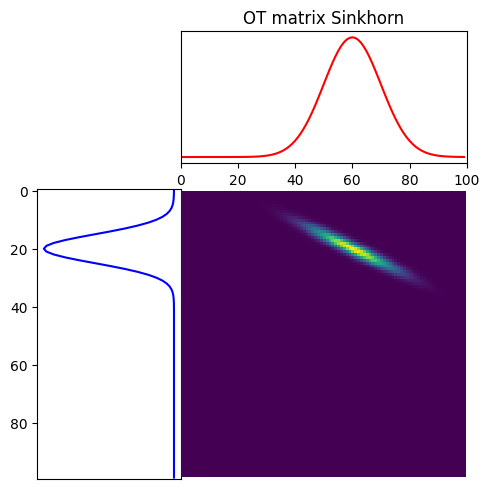

In [25]:
# -*- coding: utf-8 -*-
"""
======================================
Optimal Transport for 1D distributions
======================================

This example illustrates the computation of EMD and Sinkhorn transport plans
and their visualization.

"""

# Author: Remi Flamary <remi.flamary@unice.fr>
#
# License: MIT License
# sphinx_gallery_thumbnail_number = 3

import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

##############################################################################
# Generate data
# -------------


#%% parameters

n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std
b = gauss(n, m=60, s=10)

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()


##############################################################################
# Plot distributions and loss matrix
# ----------------------------------

#%% plot the distributions

pl.figure(1, figsize=(6.4, 3))
pl.plot(x, a, 'b', label='Source distribution')
pl.plot(x, b, 'r', label='Target distribution')
pl.legend()

#%% plot distributions and loss matrix

pl.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, M, 'Cost matrix M')

##############################################################################
# Solve EMD
# ---------


#%% EMD

# use fast 1D solver
G0 = ot.emd_1d(x, x, a, b)

# Equivalent to
# G0 = ot.emd(a, b, M)

pl.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, G0, 'OT matrix G0')

##############################################################################
# Solve Sinkhorn
# --------------


#%% Sinkhorn

lambd = 1e-3
Gs = ot.sinkhorn(a, b, M, lambd, verbose=True)

pl.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs, 'OT matrix Sinkhorn')

pl.show()

In [26]:
x_a_1d = np.reshape(a, (-1,))
x_b_1d = np.reshape(b, (-1,))
perm_a = np.argsort(x_a_1d)
perm_b = np.argsort(x_b_1d)

# 3. Visualize distance matrix difference

In [13]:
import seaborn as sns
def plot_difference(C1, C2):
    C = C1-C2
    sns.heatmap(C, linewidth=0.5)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000291FF932490>


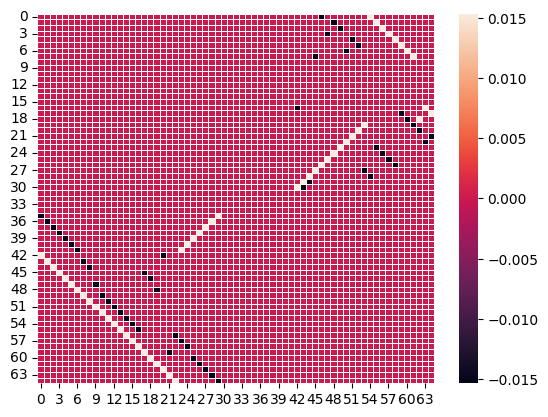

In [20]:
plot_difference(pi_wtk, pi_kpg_sequence)